# 1. Introduction

 **There are two main areas we can focus on to boost the accuracy of our predictions:**

* Improving the features we train our model on
* Improving the model itself

**Feature Selection**

Feature selection is important because it helps to `exclude features which are not good predictors,` or features that are closely related to each other. Both of these will cause our model to be less accurate, particularly on previously unseen data.

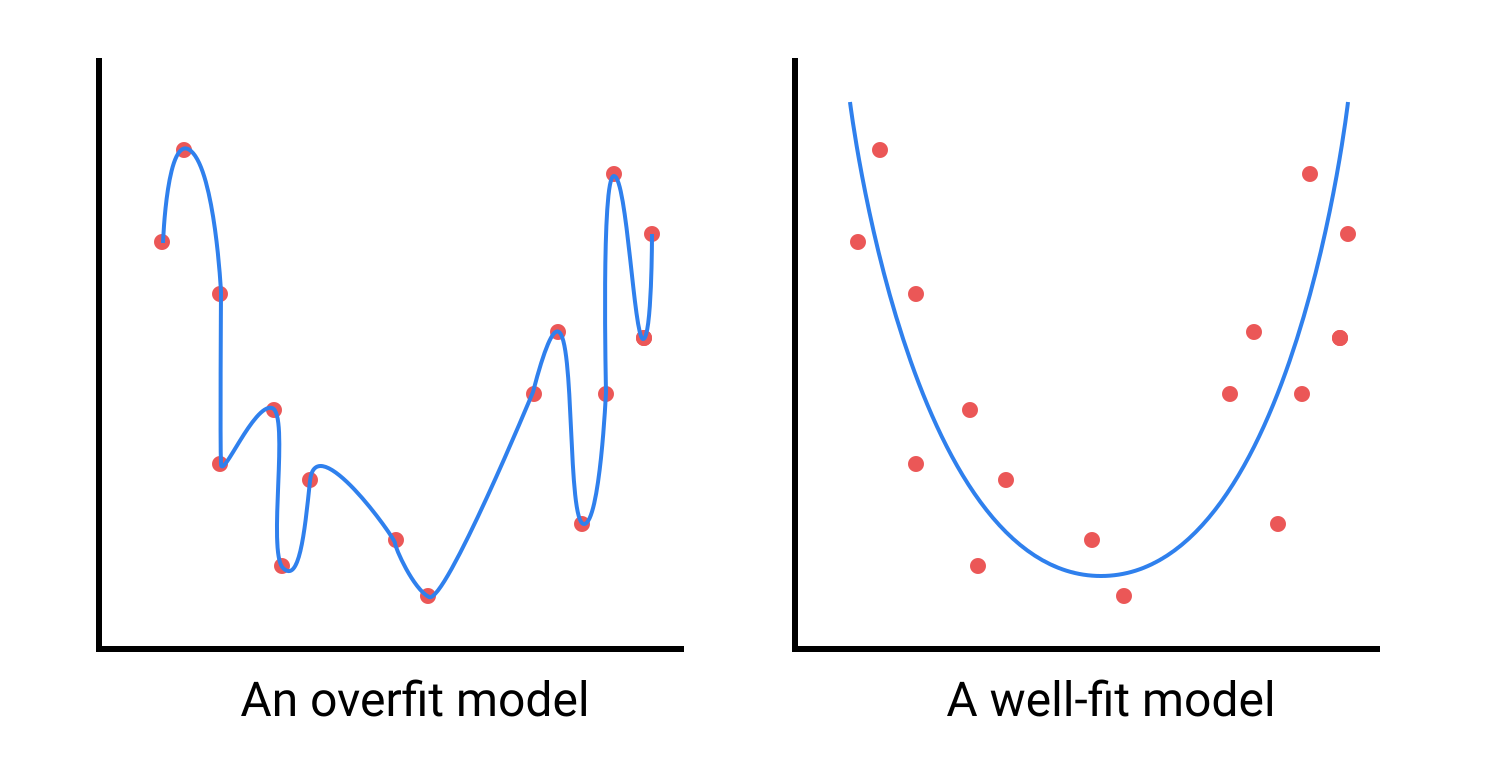

In [1]:
from IPython.display import SVG
SVG(url='https://s3.amazonaws.com/dq-content/186/overfitting.svg')

**The model on the left is `overfitting`, which means the model represents the training data too closely, and is unlikely to predict well on unseen data**

The model on the right is **well-fit.** It captures the underlying pattern in the data without the detailed noise found just in the training set. A well fit model is likely to make accurate predictions on previously unseen data. **The key to creating a well-fit model is to select the right balance of features, and to create new features to train your model.**

## TODO:
* Use the process_age() function:
  * To convert the Age column in train, assigning the result to train.
  * To convert the Age column in holdout, assigning the result to holdout.
* Create a for loop which iterates over the column names "Age_categories", "Pclass", and "Sex". In each iteration:
  * Use the create_dummies() function to process the train dataframe for the given column, assigning the result to train.
  * Use the create_dummies() function to process the holdout dataframe for the given column, assigning the result to holdout.
* Use the print() function to display the columns in train using train.columns.

In [2]:
import pandas as pd 

train=pd.read_csv('train.csv')
holdout=pd.read_csv('test.csv')


In [3]:
def process_age(df):
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

In [4]:
def create_dummies(df,column_name):
    dummies=pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies],axis=1)
    return df

In [5]:
train=process_age(train)
holdout=process_age(holdout)

In [6]:
columns=["Age_categories","Pclass","Sex"]
for column in columns:
    train=create_dummies(train,column)
    holdout=create_dummies(holdout,column)

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male'],
      dtype='object')

# 2. Preparing More Features

* 'Survived' is target column and 'PassengerID' is assigned just to cross check results so these columns can be ignored.
* Here is a list of the remaining columns (with a brief description), followed by 10 randomly selected passengers from and their data from those columns, so we can refamiliarize ourselves with the data.

  * SibSp - The number of siblings or spouses the passenger had aboard the Titanic
  * Parch - The number of parents or children the passenger had aboard the Titanic
  * Ticket - The passenger's ticket number
  * Fare - The fair the passenger paid
  * Cabin - The passengers cabin number
  * Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [8]:
columns = ['SibSp','Parch','Fare','Cabin','Embarked']
train[columns][:10]

,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,7.2500,NaN,S
1,1,0,71.2833,C85,C
2,0,0,7.9250,NaN,S
3,1,0,53.1000,C123,S
4,0,0,8.0500,NaN,S
5,0,0,8.4583,NaN,Q
6,0,0,51.8625,E46,S
7,3,1,21.0750,NaN,S
8,0,2,11.1333,NaN,S
9,1,0,30.0708,NaN,C


* We can use the Dataframe.describe() method to give us some more information on the values within each remaining column.

In [9]:
train[columns].describe(include='all')

,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,NaN,147,3
top,NaN,NaN,NaN,B96 B98,S
freq,NaN,NaN,NaN,4,644
mean,0.523008,0.381594,32.204208,NaN,NaN
std,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,0.000000,31.000000,NaN,NaN


### Ovservation:
* Of these, SibSp, Parch and Fare look to be standard numeric columns with no missing values. Cabin has values for only 204 of the 891 rows, and even then most of the values are unique, so for now we will leave this column also. Embarked looks to be a standard categorical column with 3 unique values, much like PClass was, except that there are two missing values. We can easily fill these two missing values with the most common value, "S" which occurs 644 times.

* Looking at our numeric columns, we can see a big difference between the range of each. SibSp has values between 0-8, Parch between 0-6, and Fare is on a dramatically different scale, with values ranging from 0-512. In order to make sure these values are equally weighted within our model, we'll need to **rescale the data.**

* Rescaling simply stretches or shrinks the data as needed to be on the same scale, in our case between 0 and 1.

* Within scikit-learn, the` preprocessing.minmax_scale()` function allows us to quickly and easily rescale our data:

In [10]:
from sklearn.preprocessing import minmax_scale

## TODO:
* For both the train and holdout dataframes:
  * Use the Series.fillna() method to replace any missing values in the Embarked column with "S"
  * Use our create_dummies() function to create dummy columns for the Embarked column.
  * Use minmax_scale() to rescale the SibSp, Parch, and Fare columns, assigning the results back to new columns SibSp_scaled, Parch_scaled. and Fare_scaled respectively.

In [11]:
train['Embarked'].fillna("S",inplace=True)
holdout['Embarked'].fillna("S",inplace=True)

In [12]:
train=create_dummies(train,'Embarked')
holdout=create_dummies(holdout,'Embarked')

In [13]:
import warnings
warnings.filterwarnings('ignore')

columns_s = ["SibSp","Parch","Fare"]

for col in columns_s:
    train[col+'_scaled']=minmax_scale(train[col])
    holdout[col+'_scaled']=minmax_scale(holdout[col])
    

In [14]:
# The holdout set has a missing value in the Fare column 
holdout['Fare']=holdout['Fare'].fillna(holdout['Fare'].mean())

# 3. Determining the Most Relevant Features

* `In order to select the best-performing features, we need a way to measure which of our features are relevant to our outcome` - in this case, the survival of each passenger.

*  One effective way is by training a logistic regression model using all of our features, and` then looking at the coefficients of each feature.`

## TODO:
* Instantiate a LogisticRegression() object.
* Fit the LogisticRegression object using the columns from the list columns from the train dataframe and the target column Survived.
* Use the coef_ attribute to retrieve the coefficients of the features, and assign the results to coefficients.
* Create a series object using coefficients, with the feature column names as the index and assign it to feature_importance.
* Use the Series.plot.barh() method to plot the feature_importance series.

In [15]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled'],
      dtype='object')

In [16]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']

In [17]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [18]:
lr=LogisticRegression()

In [19]:
lr.fit(train[columns],train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
coefficients=lr.coef_
coefficients.shape

(1, 18)

In [21]:
feature_importance=pd.Series(coefficients[0],index=columns)

In [22]:
feature_importance

Age_categories_Missing       -0.347236
Age_categories_Infant         1.860606
Age_categories_Child          0.344932
Age_categories_Teenager      -0.182734
Age_categories_Young Adult   -0.011089
Age_categories_Adult         -0.526202
Age_categories_Senior        -0.900500
Pclass_1                      1.045156
Pclass_2                      0.137295
Pclass_3                     -0.944674
Sex_female                    1.456109
Sex_male                     -1.218332
Embarked_C                    0.250103
Embarked_Q                    0.243743
Embarked_S                   -0.256069
SibSp_scaled                 -1.747757
Parch_scaled                 -0.776502
Fare_scaled                   0.543085
dtype: float64

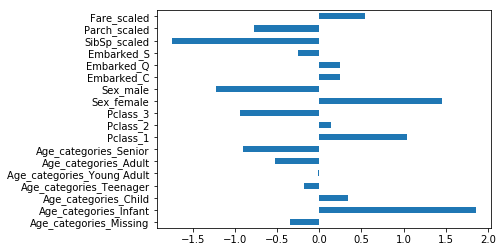

In [23]:
feature_importance.plot.barh()

# 4. Training a model using relevant features.

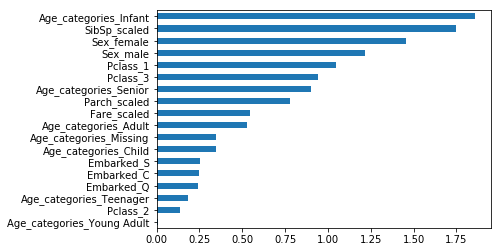

In [24]:
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

We'll train a new model `with the top 8 scores` and check our accuracy using cross validation.

## TODO:
* Instantiate a LogisticRegression() object.
* Use the model_selection.cross_val_score() function and assign the returned object to scores, using:
  * The columns specified in columns and all rows from the train dataframe.
  * A cv parameter of 10.
* Calculate the mean of the cross validation scores and assign the results to accuracy.
* Use the print() function to display the variable accuracy.

In [25]:
lr=LogisticRegression()

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
columns_imp = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

scores=cross_val_score(lr,train[columns_imp],train['Survived'],cv=10)
scores

array([0.82222222, 0.82222222, 0.79775281, 0.86516854, 0.83146067,
       0.78651685, 0.79775281, 0.76404494, 0.84269663, 0.81818182])

In [28]:
accuracy=scores.mean()
accuracy

0.8148019521053229

# 5. Submitting our Improved Model to Kaggle

## TODO:
* Instantiate a LogisticRegression() object and fit it using columns_imp and train['Survived'].
* Use the predict() method to make predictions using the same columns in the holdout dataframe, and assign the result to holdout_predictions
* Create a dataframe submission with two columns:
  * PassengerId, with the values from the PassengerId column of the holdout dataframe.
  * Survived, with the values from holdout_predictions.
* Use the DataFrame.to_csv method to save the submission dataframe to the filename submission_1.csv.

In [29]:
lr=LogisticRegression()

In [30]:
lr.fit(train[columns_imp],train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
holdout_predictions=lr.predict(holdout[columns_imp])

In [32]:
submission=pd.DataFrame({'PassengerID':holdout['PassengerId'],'Survived':holdout_predictions})
submission

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [33]:
submission.to_csv('submission_1.csv',index=False)

# 6. Engineering a New Feature Using Binning

**A lot of the gains in accuracy in machine learning come from Feature Engineering. `Feature engineering is the practice of creating new features from your existing data.`**

One common way to engineer a feature is using a `technique called binning.` Binning is when you take a continuous feature, like the fare a passenger paid for their ticket, and separate it out into several ranges (or 'bins'), `turning it into a categorical variable.`

* `This can be useful when there are patterns in the data that are non-linear and you're using a linear model (like logistic regression)`. We actually used binning in the previous mission when we dealt with the Age column, although we didn't use the term.

## TODO:
* Using the process_age() function as a model, create a function process_fare() that uses the pandas cut() method to create bins for the Fare column and assign the results to a new column called Fare_categories.
  * We have already dealt with missing values in the Fare column, so you won't need the line that uses fillna().
* Use the process_fare() function on both the train and holdout dataframes, creating the four 'bins':
  * 0-12, for values between 0 and 12.
  * 12-50, for values between 12 and 50.
  * 50-100, for values between 50 and 100.
  * 100+, for values between 100 and 1000.
* Use the create_dummies() function we created earlier in the mission on both the train and holdout dataframes to create dummy  columns based on our new fare bins.

In [34]:
def process_fare(df,cut_points,label_names):
    df['Fare_categories']=pd.cut(df['Fare'],cut_points,labels=label_names)
    return df

In [35]:
cut_points = [0,12,50,100,1000]
label_names = ["0-12","12-50","50-100","100+"]

In [36]:
train=process_fare(train,cut_points,label_names)

In [37]:
holdout=process_fare(holdout,cut_points,label_names)

In [38]:
train=create_dummies(train,'Fare_categories')
holdout=create_dummies(holdout,'Fare_categories')

# 7. Engineering Features From Text Columns

Another way to engineer features is by extracting data from text columns. Earlier, we decided that the Name and Cabin columns weren't useful by themselves, but what if there is some data there we could extract?

In [39]:
train[['Name','Cabin']]

,Name,Cabin
0,"Braund, Mr. Owen Harris",NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C85
2,"Heikkinen, Miss. Laina",NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C123
4,"Allen, Mr. William Henry",NaN
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",E46
7,"Palsson, Master. Gosta Leonard",NaN
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",NaN
9,"Nasser, Mrs. Nicholas (Adele Achem)",NaN


## TODO:
* Use extract(), map() and the dictionary titles to categorize the titles for the holdout dataframe and assign the results to a new column Title.
* For both the train and holdout dataframes:
  * Use the str() accessor to extract the first letter from the Cabin column and assign the result to a new column Cabin_type.
  * Use the fillna() method to fill any missing values in Cabin_type with "Unknown"
* For the newly created columns Title and Cabin_type, use create_dummies() to create dummy columns for both the train and holdout dataframes.

In [40]:
train.head()['Cabin']

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [41]:
train.head()['Cabin'].str[0]

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

In [42]:
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

In [43]:
extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
train["Title"] = extracted_titles.map(titles)
extracted_titles = holdout["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
holdout["Title"] = extracted_titles.map(titles)

train["Cabin_type"] = train["Cabin"].str[0]
train["Cabin_type"] = train["Cabin_type"].fillna("Unknown")

holdout["Cabin_type"] = holdout["Cabin"].str[0]
holdout["Cabin_type"] = holdout["Cabin_type"].fillna("Unknown")

for column in ["Title","Cabin_type"]:
    train = create_dummies(train,column)
    holdout = create_dummies(holdout,column)

In [44]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled', 'Fare_categories',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+', 'Title', 'Cabin_type',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown'],
      dtype='object')

# 8. Finding Correlated Features

 One thing to be aware of as you start to add more features is a concept called collinearity. **Collinearity occurs where more than one feature contains data that are similar.**

* `The effect of collinearity is that your model will overfit` - you may get great results on your test data set, but then the model performs worse on unseen data (like the holdout set).

One easy way to understand collinearity is with a simple binary variable like the Sex column in our dataset. Every passenger in our data is categorized as either male or female, so` 'not male' is exactly the same as 'female'.`

As a result, when we created our two dummy columns from the categorical Sex column, we've actually created two columns with identical data in them. This will happen whenever we create dummy columns, and is called the `dummy variable trap`. The easy solution is to choose one column to drop any time you make dummy columns.

Collinearity can happen in other places, too. A common way **`to spot collinearity is to plot correlations between each pair of variables in a heatmap`**

*  The easiest way to produce this plot is using the `DataFrame.corr()` method to produce a correlation matrix, and then use the Seaborn library's `seaborn.heatmap()` function to plot the values:

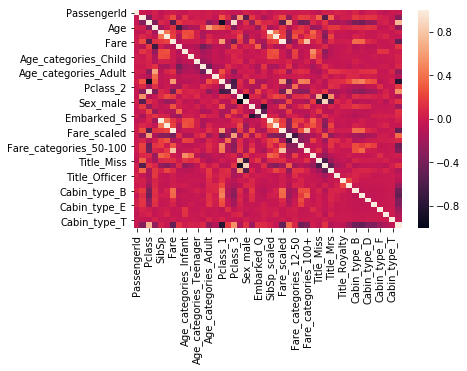

In [45]:
import seaborn as sns

correlations=train.corr()
sns.heatmap(correlations)

## TODO:
Use the plot_correlation_heatmap() function to produce a heatmap for the train dataframe, using only the features in the list columns.

In [46]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E','Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown']

In [47]:
import numpy as np 
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df):
    correlations=df.corr()
    sns.set(style='white')
    mask=np.zeros_like(correlations,dtype=np.bool)
    mask[np.triu_indices_from(mask)]=True
    
    f,ax=plt.subplots(figsize=(11,9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

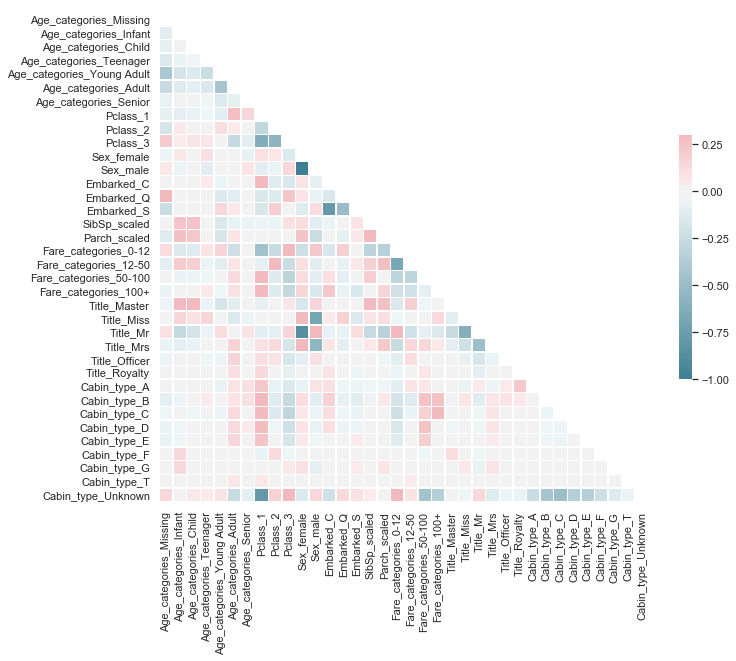

In [48]:
plot_correlation_heatmap(train[columns])

# 9. Final Feature Selection using RFECV

We can see that there is a high correlation between Sex_female/Sex_male and Title_Miss/Title_Mr/Title_Mrs. We will remove the columns Sex_female and Sex_male since the title data may be more nuanced.

Apart from that, we should remove one of each of our dummy variables to reduce the collinearity in each. We'll remove:

* Pclass_2
* Age_categories_Teenager
* Fare_categories_12-50
* Title_Master
* Cabin_type_A

* In an earlier step, we manually used the logit coefficients to select the most relevant features. An alternate method is to use one of scikit-learn's inbuilt feature selection classes. We will be using the feature_selection.RFECV class which performs `recursive feature elimination with cross-validation.`

## TODO:
* Instantiate a LogisticRegression() object, lr.
* Instantiate a RFECV() object selector using the newly created lr object and cv=10 as parameters.
* Use the fit() method to fit selector using all_X and all_y
* Use the support_ attribute selector to subset all_X.columns, and assign the result to optimized_columns.

In [49]:
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV    
lr=LogisticRegression()
selector=RFECV(lr,cv=10)
selector.fit(train[columns],train['Survived'])

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [50]:
optimized_columns=train[columns].columns[selector.support_]

In [51]:
optimized_columns

Index(['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown'], dtype='object')

# 10. Training A Model Using our Optimized Columns 

## TODO:
* Instantiate LogisticRegression() object.
* Use the model_selection.cross_val_score() function and assign the results to scores, using:
  * all_x i.e train[columns] and all_y i.e train['Survived'].
  * A cv parameter of 10.
* Calculate the mean of the cross validation scores and assign the results to accuracy.

In [52]:
lr=LogisticRegression()
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr,train[columns],train['Survived'],cv=10)
accuracy=scores.mean()
accuracy

0.8204954034729315

## TODO:
* Instantiate a LogisticRegression() object and fit it using all_X and all_y.
* Use the predict() method to make predictions using the same columns in the holdout dataframe, and assign the result to holdout_predictions.
* Create a dataframe submission with two columns:
   * PassengerId, with the values from the PassengerId column of the holdout dataframe.
  * Survived, with the values from holdout_predictions.
* Use the DataFrame.to_csv method to save the submission dataframe to the filename submission_2.csv.

In [53]:
lr=LogisticRegression()
lr.fit(train[optimized_columns],train['Survived'])
holdout_predictons=lr.predict(holdout[optimized_columns])

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_2.csv",index=False)